# Samurai by the numbers
## by Tzuyu Chou (Cactuar)

In [1]:
from samurai import Samurai
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

## lvl 1-3 rotation

### Up to level 3, you only have one weaponskill... so use it.

In [2]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),]

In [3]:
df0 = pd.DataFrame(actions, columns=['action', 'potency'])
df0['total potency'] = df0['potency'].cumsum(axis=0)
display(df0)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Hakaze,150.0,300.0
2,Hakaze,150.0,450.0
3,Hakaze,150.0,600.0
4,Hakaze,150.0,750.0
5,Hakaze,150.0,900.0
6,Hakaze,150.0,1050.0
7,Hakaze,150.0,1200.0
8,Hakaze,150.0,1350.0


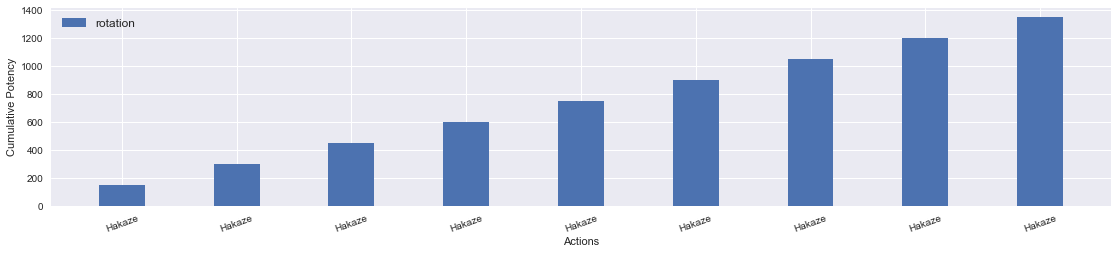

In [4]:
plot_potency(df0)

## lvl 4-17 rotation

### At level 4, you gain the use of Jinpu, which combos from Hakaze and gives you your damage up buff. You'll definitely want to keep this buff up at all times and it should be simple enough with its 30s duration. The next weaponskill you obtain is Enbi, a ranged attack with a niche use. Level 6 grants you the defensive buff, Third Eye, and level 10 grants you the ability Ageha. Use Ageha on cooldown between weaponskills for additional damage.

In [5]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [6]:
df1 = pd.DataFrame(actions, columns=['action', 'potency'])
df1['total potency'] = df1['potency'].cumsum(axis=0)
display(df1)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Jinpu,322.0,472.0
2,Hakaze,172.5,644.5
3,Jinpu,322.0,966.5
4,Hakaze,172.5,1139.0
5,Jinpu,322.0,1461.0
6,Hakaze,172.5,1633.5
7,Jinpu,322.0,1955.5
8,Hakaze,172.5,2128.0


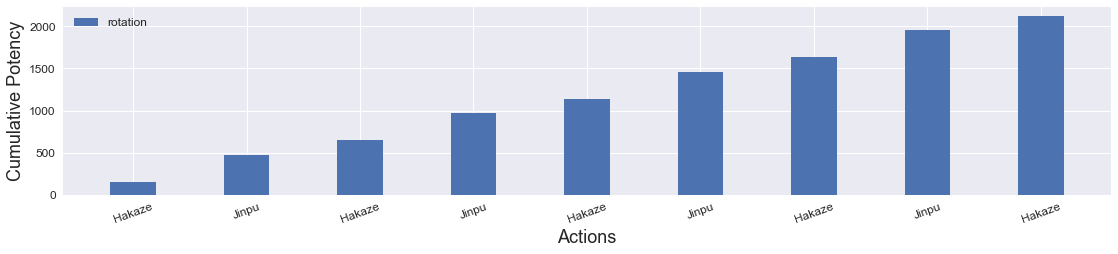

In [7]:
plot_potency(df1)

### How does this compare to the previous rotation?

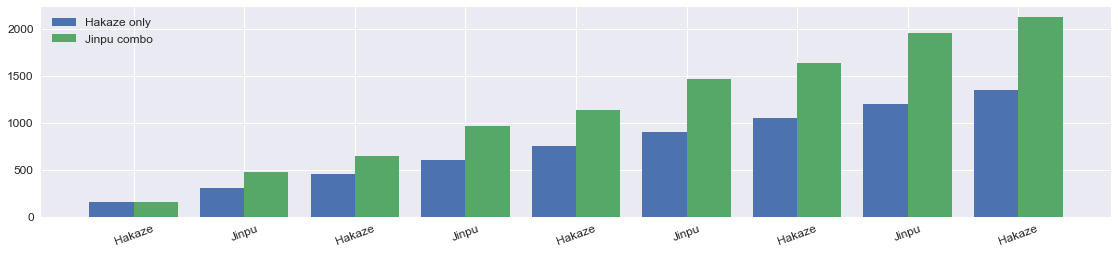

In [8]:
compare_potencies([df0, df1], ['Hakaze only', 'Jinpu combo'])

### You'll definitely want to use the Jinpu combo and keep the buff up.

## lvl 18-29 rotation

### Level 18 sees the introduction of your haste buff, Shifu. When executed as a combo, Shifu grants you this buff for a duration of 30s in addition to the additional combo potency. At these levels, it's fairly close as to which buff takes priority, Shifu or Jinpu. However, with the introduction of Sen, you will definitely want to prioritize Shifu so that you may open your Sen more often to execute the powerful Iaijutsu more often.

** Note: the haste buff is modeled as a straight potency multiplier at this time since the discrete time model using timesteps of GCD does not account for the decreased GCD.

In [9]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [10]:
df2 = pd.DataFrame(actions, columns=['action', 'potency'])
df2['total potency'] = df2['potency'].cumsum(axis=0)
display(df2)

,action,potency,total potency
0,Hakaze,150.00,150.00
1,Shifu,308.00,458.00
2,Hakaze,165.00,623.00
3,Jinpu,354.20,977.20
4,Hakaze,189.75,1166.95
5,Shifu,354.20,1521.15
6,Hakaze,189.75,1710.90
7,Jinpu,354.20,2065.10
8,Hakaze,189.75,2254.85


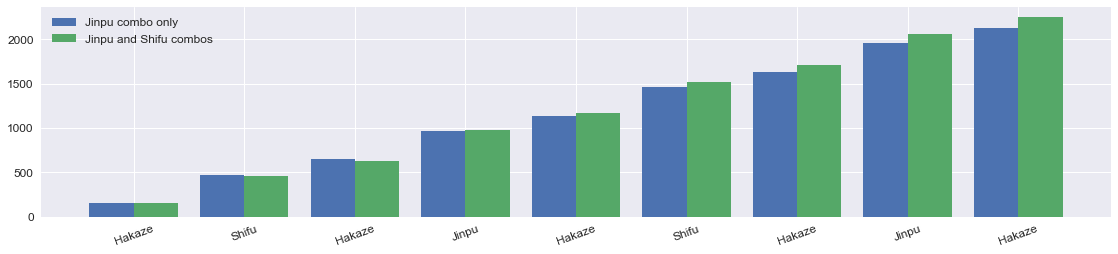

In [11]:
compare_potencies([df1, df2], ['Jinpu combo only', 'Jinpu and Shifu combos'])

#### Note: The Shifu buff is modeled as a 10% increase in potency per GCD, chosen arbitrarily. This explains the discrepancy for the first two GCDs. 

### Note that level 26 introduces your first AoE ability, Fuga. At this time, it does not combo to or from anything and deals 100 potency to all targets in a frontal cone. However, our Shifu/Jinpu combo rotation deals a hefty...

In [12]:
df2['total potency'][7] / 8

258.13749999999999

### average potency per GCD! Napkin math reveals that Fuga should do more potency per GCD for three or more targets. Should we put our Shifu and Jinpu buffs if they're not up before using Fuga? Depends on how long the encounter is.

In [22]:
dfs_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Hakaze', sam.hakaze()),
               ('Shifu', sam.shifu()),
               ('Hakaze', sam.hakaze()),
               ('Jinpu', sam.jinpu()),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)   

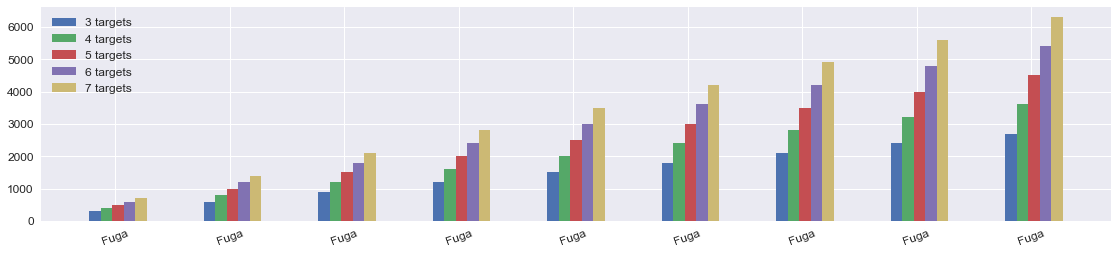

In [23]:
compare_n_potencies(dfs, labels)

### For Fuga with no buffs:

In [27]:
dfs_no_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_no_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)  

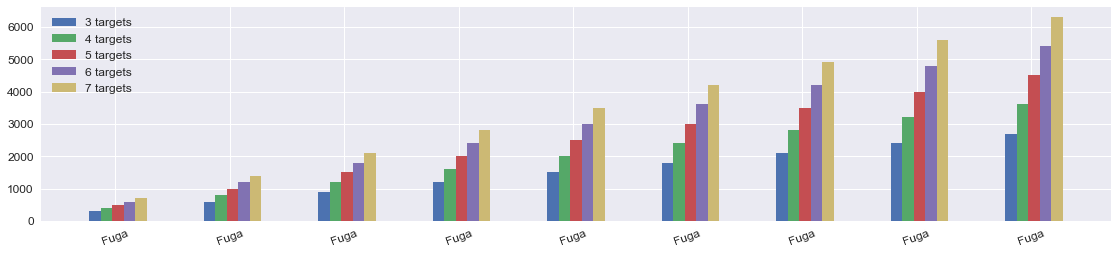

In [29]:
compare_n_potencies(dfs_no_buff, labels)

### The potency over four GCDs to put up Shifu and Jinpu is about 977. For $n$ targets, Fuga deals $4*n*100$ potency over that same time frame. The new potency per GCD with the buffs up is about $1.15*1.10*100=126.5$ potency times the number of targets.

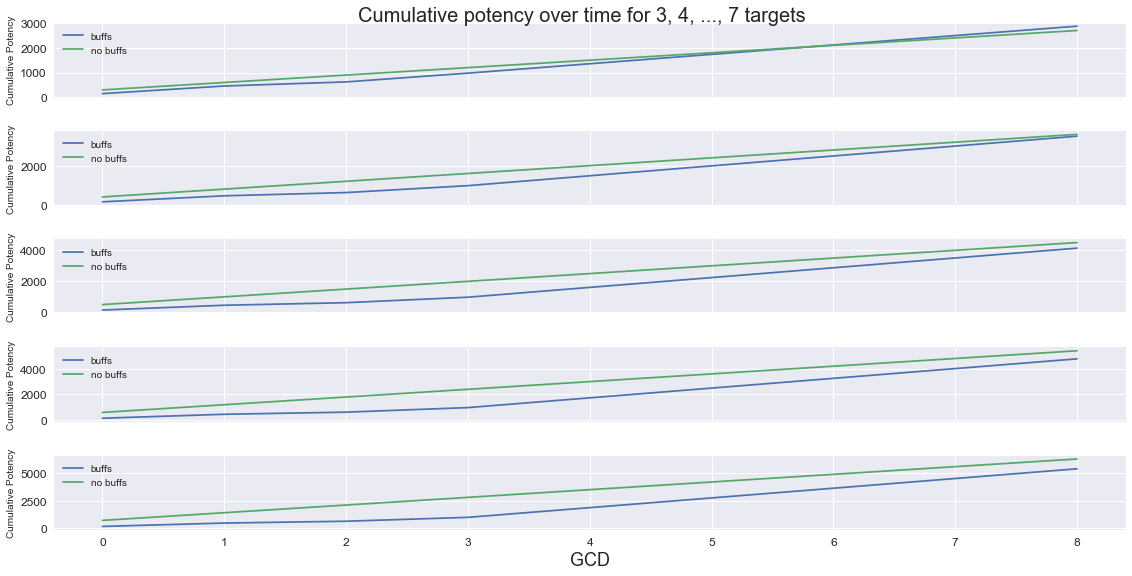

In [52]:
fig, axes = plt.subplots(nrows=len(dfs_buff), ncols=1, sharex=True, figsize=(16,12))
fig.tight_layout(pad=2)

for k, df in enumerate(dfs_buff): 
    ax = axes[k]
    
    ax.plot(df['total potency'], label='buffs')
    ax.plot(dfs_no_buff[k]['total potency'], label='no buffs')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('GCD')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})

fig.suptitle('Cumulative potency over time for 3, 4, ..., 7 targets')

### There are approximately ten GCDs after putting up your first buff, Shifu before you need to refresh it. For small mob counts, the crossover point where putting up buffs before using Fuga is more optimal occurs fairly early. However, as the number of targets increases, the upfront "cost" of putting the buffs up does not pay off. At these low levels, the pull sizes are likely to be small and depending on party composition, the AoE damage may not be high... so putting up buffs may win out (just watch out for the TP consumption!)

## lvl 30-39 rotation